In [133]:
from  sklearn.cluster import KMeans
import skimage
from matplotlib import pylab
%matplotlib inline
import pandas as pd
import numpy as np
import math as m

In [3]:
from skimage.io import imread
image = imread('parrots.jpg')

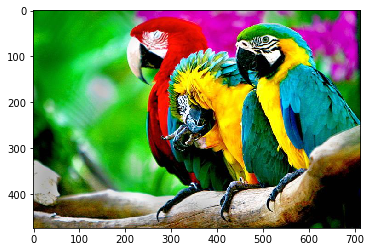

In [4]:
pylab.imshow(image)

In [5]:
float_image = skimage.img_as_float(image)

In [6]:
float_image.shape

(474, 713, 3)

In [7]:
cls = KMeans(random_state=241, init='k-means++')

In [53]:
cls.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=241, tol=0.0001, verbose=0)

In [46]:
float_image[0][0]

array([ 0.01568627,  0.49411765,  0.01960784])

In [20]:
float_image[473].shape

(713, 3)

In [47]:
data = []
for i in range(0,float_image.shape[0]):
    for j in range(0,float_image.shape[1]):
        data.append([i,j,float_image[i][j][0],float_image[i][j][1],float_image[i][j][2]])
        
        

In [50]:
df = pd.DataFrame(data, columns= ['x','y','R','G','B'])

In [55]:
df.head()

,x,y,R,G,B
0,0,0,0.015686,0.494118,0.019608
1,0,1,0.007843,0.494118,0.007843
2,0,2,0.007843,0.494118,0.007843
3,0,3,0.007843,0.494118,0.007843
4,0,4,0.007843,0.501961,0.011765


In [ ]:
x

In [57]:
cls.cluster_centers_

array([[  3.58414591e+02,   4.46604707e+02,   4.19624923e-01,
          4.43392597e-01,   2.55165041e-01],
       [  3.56544835e+02,   8.93244484e+01,   3.19730566e-01,
          4.99076699e-01,   2.62164716e-01],
       [  1.16566635e+02,   6.22299670e+02,   3.45864150e-01,
          4.41803238e-01,   4.73438118e-01],
       [  1.14433745e+02,   2.64455026e+02,   5.75932302e-01,
          4.69349865e-01,   2.74026964e-01],
       [  3.53531433e+02,   6.24004616e+02,   2.94315452e-01,
          3.26967932e-01,   2.10884376e-01],
       [  3.51526327e+02,   2.68356443e+02,   3.37121477e-01,
          5.19523779e-01,   2.75877572e-01],
       [  1.21333062e+02,   4.42708545e+02,   5.98546490e-01,
          4.78217956e-01,   3.24932760e-01],
       [  1.19586204e+02,   8.76201350e+01,   1.47375262e-01,
          6.78432863e-01,   1.97432521e-01]])

In [60]:
len(cls.labels_)

337962

In [83]:
df['label']=cls.labels_
df['label'].max()

7

In [84]:
df_mean=df
df_med=df

In [85]:
for i in range(0,8):
    df_new['R'][df_new['label']==i]=df['R'][df['label']==i].mean()
    df_new['G'][df_new['label']==i]=df['G'][df['label']==i].mean()
    df_new['B'][df_new['label']==i]=df['B'][df['label']==i].mean()
    
    df_med['R'][df_new['label']==i]=df['R'][df['label']==i].median()
    df_med['G'][df_new['label']==i]=df['G'][df['label']==i].median()
    df_med['B'][df_new['label']==i]=df['B'][df['label']==i].median()
    

/Users/dskozlov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/dskozlov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dskozlov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.

In [88]:
df_med.head()

,x,y,R,G,B,label
0,0,0,0.147408,0.678511,0.197429,7
1,0,1,0.147408,0.678511,0.197429,7
2,0,2,0.147408,0.678511,0.197429,7
3,0,3,0.147408,0.678511,0.197429,7
4,0,4,0.147408,0.678511,0.197429,7


In [108]:
w, h, d = image.shape

In [110]:
pixels = pd.DataFrame(np.reshape(image, (w*h, d)), columns=['R', 'G', 'B'])

In [142]:
def cluster(pixels, n_clusters=8):
    print ('Clustering: ' + str(n_clusters))

    pixels = pixels.copy()
    model = KMeans(n_clusters=n_clusters, init='k-means++', random_state=241)
    pixels['cluster'] = model.fit_predict(pixels)

    means = pixels.groupby('cluster').mean().values
    mean_pixels = [means[c] for c in pixels['cluster'].values]
    mean_image = np.reshape(mean_pixels, (w, h, d))
    #imsave('images/mean/parrots_' + str(n_clusters) + '.jpg', mean_image)

    medians = pixels.groupby('cluster').median().values
    median_pixels = [medians[c] for c in pixels['cluster'].values]
    median_image = np.reshape(median_pixels, (w, h, d))
    #imsave('images/median/parrots_' + str(n_clusters) + '.jpg', median_image)

    return mean_image, median_image


In [150]:
mean,median = cluster(pixels, n_clusters=3)

Clustering: 3


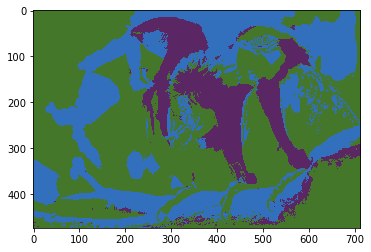

In [151]:
pylab.imshow(mean)

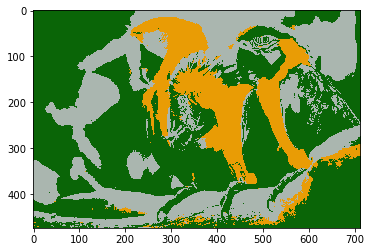

In [152]:
pylab.imshow(median)

In [134]:
def psnr(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    return 10 * m.log10(float(1) / mse)

In [135]:
for n in range(1, 21):
    mean_image, median_image = cluster(pixels, n)
    psnr_mean, psnr_median = psnr(image, mean_image), psnr(image, median_image)
    print (psnr_mean, psnr_median)

Clustering: 1
-38.31196806390781 -20.09496434771109
Clustering: 2
-36.050626523748015 -19.89305364522617
Clustering: 3
-34.977316564071856 -19.654646447016553
Clustering: 4
-33.762985667810305 -19.77290150421939
Clustering: 5
-32.60365741137311 -19.70093287142362
Clustering: 6
-31.586809512048916 -19.331841154489965
Clustering: 7
-30.489811100042587 -19.291839014991915
Clustering: 8
-29.693974594615526 -19.174541401598177
Clustering: 9
-29.018130419704242 -19.16150895451559
Clustering: 10
-28.490046972763796 -18.866709270725952
Clustering: 11
-28.003214862164523 -18.828505101947208
Clustering: 12
-27.5382872891625 -18.713115056571322
Clustering: 13
-27.10942392908474 -18.63947901576825
Clustering: 14
-26.833957046764596 -18.614803887091387
Clustering: 15
-26.523631889589137 -18.604469583353872
Clustering: 16
-26.267693795716273 -18.51941771413033
Clustering: 17
-26.010997615907847 -18.478716539806438
Clustering: 18
-25.79530486817635 -18.47737532712198
Clustering: 19
-25.60870578546099

In [137]:
#Правильный ответ 11, но у меня получилось 1, почему? 
with open("Solution/Assignment_1_1.txt", "w") as text_file:
    print(11, file=text_file)